<a href="https://colab.research.google.com/github/fellipemelhado/FGV/blob/main/M%C3%A9todos_Computacionais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tutorial 1: Processo de simular precos

### Processo de wiener generalisado
Δ𝑃𝑡+1 = 𝜇∆𝑡 + 𝜎𝛮(0, ∆𝑡)

In [ ]:
# Parametros incias
rm(list=ls())
library(tidyverse)

n = 100
t = 1
dt = 1/252
mu = 10 # ret esperado do ativo em 1 anos
vol = 100# vol esperado em 1 ano
s0 = 100

# Criacao da matriz
S = matrix(, 252*t, n)
S[1,] = s0

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


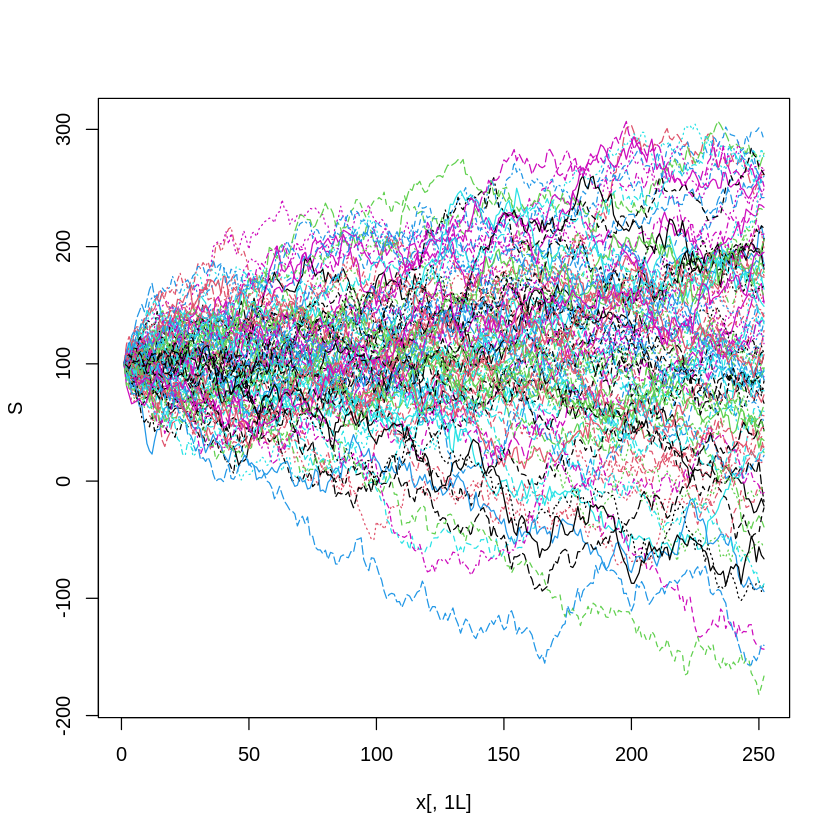

In [ ]:
# Loop

for  (i in 2:252*t) {
  for (j in 1:n){
    S[i,j] = S[i-1,j] + mu*dt + vol*rnorm(1,0,sqrt(dt))
  }
}
matplot(y = S, type = 'l', )


##  Movimento Browniano Geométrico
Δ𝑃𝑡+1 = 𝜇𝑃𝑡∆𝑡 + 𝜎𝑃𝑡𝛮(0, ∆𝑡)


In [ ]:
# Parametros incias
rm(list=ls())

n = 100
t = 1
dt = 1/252
mu = 0.6 # tendencia exponencial d 1 ano
vol = 0.4 # vol esperada
s0 = 100

# Criacao da matriz
S = matrix(, 252*t, n)
S[1,] = s0

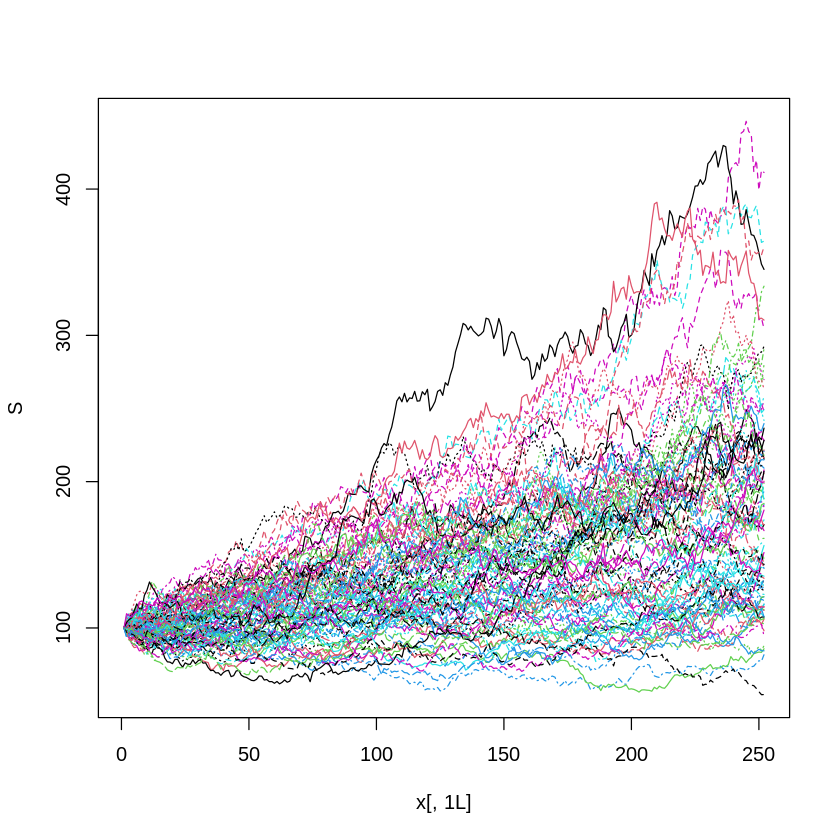

In [ ]:
  for (i in 2:252*t){
    for (j in 1:n){
      S[i,j] = S[i-1,j] * (1 + (mu*dt) + (vol * rnorm(1, 0, sqrt(dt))))
    }
  }
matplot(y = S, type = 'l')


##  Processo de reversão média
 Δ𝑃𝑡+1 = 𝜇(𝑃̅ − 𝑃𝑡)∆𝑡 + 𝜎𝑃𝑡𝛮(0, ∆𝑡)


In [ ]:
# Parametros incias
rm(list=ls())

n = 100
t = 1
dt = 1/252
mu = 0.6 # tendencia exponencial d 1 ano
vol = 0.4 # vol esperada
s0 = 100
s_barra = 110 # Tendencia longo prazo

# Criacao da matriz
S = matrix(, 252*t, n)
S[1,] = s0

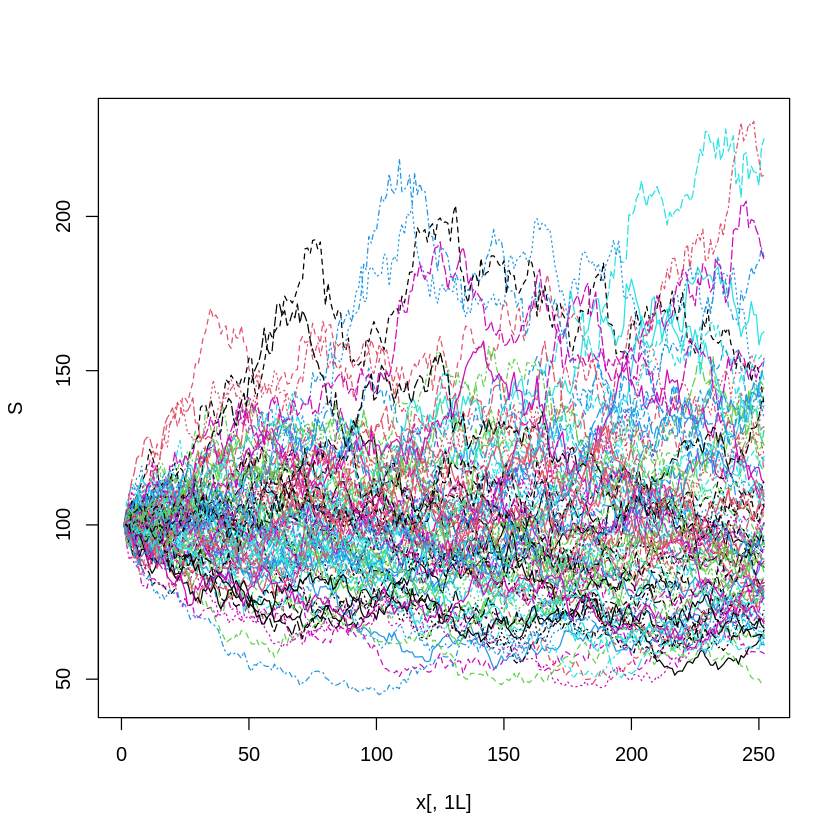

In [ ]:
for (i in 2:252*t){
  for (j in 1:n){
    S[i,j] = S[i-1,j] + mu*(s_barra - S[i-1,j])*dt + vol*S[i-1,j]*rnorm(1,0,sqrt(dt))
  }
}
matplot(y = S, type = 'l')

##  Série com memória
 Δ𝑃𝑡+1 = 𝜇𝑃𝑡∆𝑡 + 𝜎𝑃𝑡𝛮(Δ𝑃𝑡/𝑃𝑡−1, ∆𝑡)



In [ ]:
# Parametros incias
rm(list=ls())

n = 100
t = 1
dt = 1/252
mu = 0.6 # tendencia exponencial d 1 ano
vol = 0.4 # vol esperada
s0 = 100
s1 = 105 # Valor arbitrario pq precisa d t-2

# Criacao da matriz
S = matrix(, 252*t, n)
S[1,] = s0
S[2,] = s1

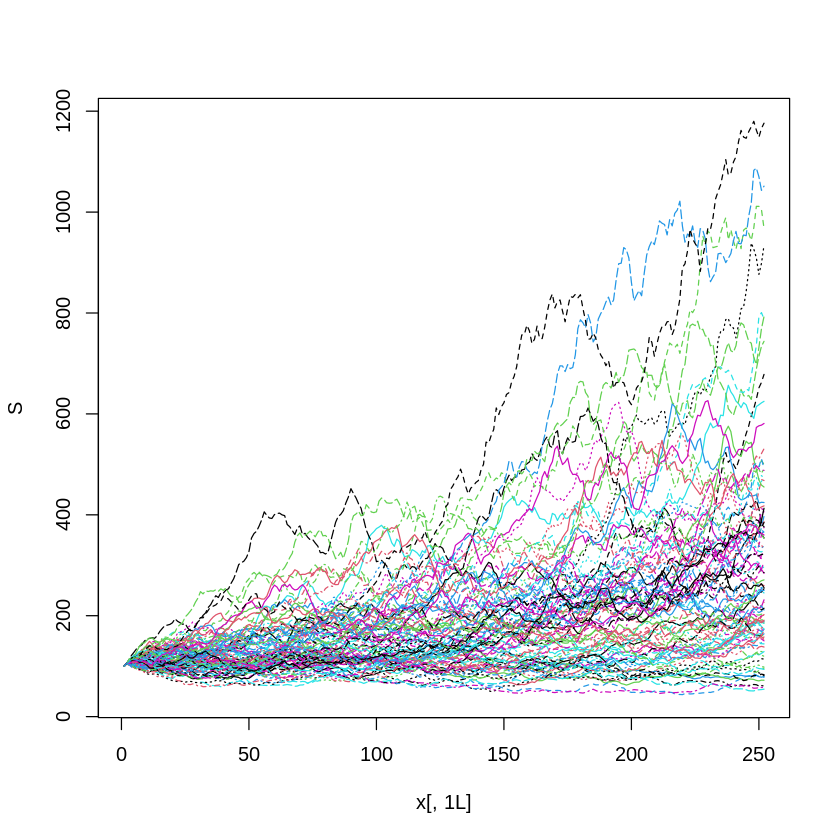

In [ ]:
for (i in 3:252*t){
  for (j in 1:n){
    S[i,j] = S[i-1,j] * (1 + (mu*dt) + (vol*rnorm(1, (S[i-1,j]-S[i-2,j])/S[i-2,j], sqrt(dt))))
  }
}
matplot(y = S, type = 'l')

## Movimento Browniano geométrico com jumps
Δ𝑃𝑡+1 = 𝜇𝑃𝑡∆𝑡 + 𝜎𝑃𝑡𝑁1(0, ∆𝑡) + 𝜎𝐽𝐵𝑒𝑟𝑛(𝑝)𝑃𝑡𝑁2(0, ∆𝑡)

In [ ]:
# Parametros incias
rm(list=ls())

n = 100
t = 1
dt = 1/252
mu = 0.6 # tendencia exponencial d 1 ano
vol = 0.4 # vol esperada
s0 = 100
p = 0.65 # probdo jump
volj = 0.5

# Criacao da matriz
S = matrix(, 252*t, n)
S[1,] = s0


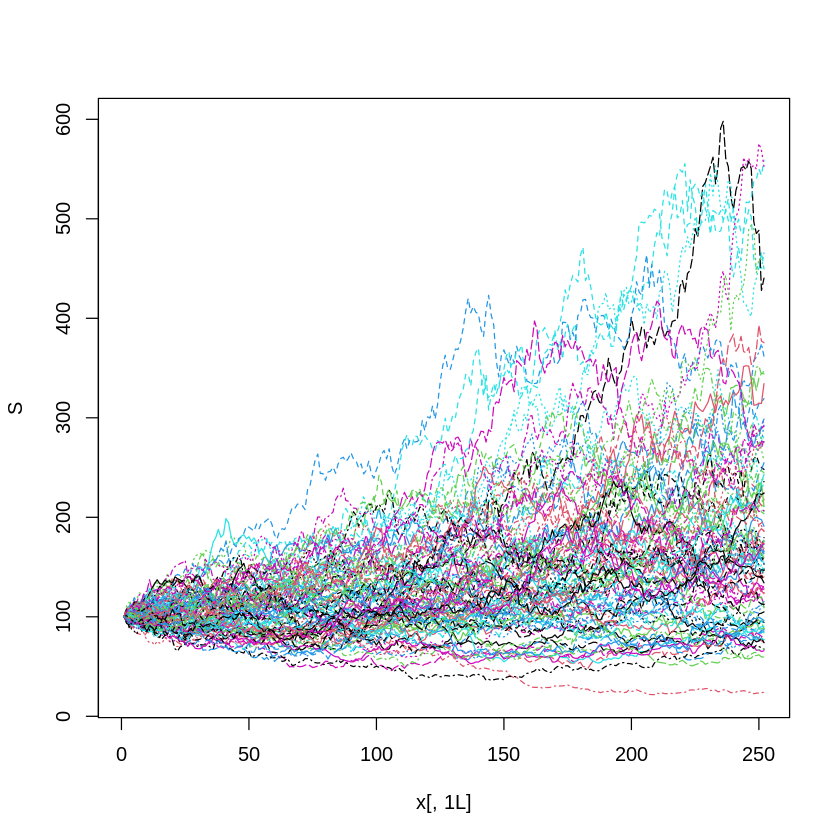

In [ ]:
for (i in 2:252*t){
  for (j in 1:n){
    S[i,j] = S[i-1,j] * (1 + (mu*dt) + (vol*rnorm(1,0,sqrt(dt))) + (volj*rbinom(1,1,p)*rnorm(1,0,sqrt(dt))))
  }
}
matplot(y = S, type = 'l')

# TUTORIAL 2 - Expectativas usando Monte Carlo
Usar GBM para precificar uma acao e reponder questoes

In [ ]:
# Parametros incias
rm(list=ls())

n = 100
t = 1
dt = 1/252
mu = 0.1 # tendencia exponencial d 1 ano
vol = 0.25 # vol esperada
s0 = 50

# Criacao da matriz
S = matrix(, 252*t, n)
S[1,] = s0

# Loop
for (i in 2:252*t){
  for (j in 1:n){
    S[i,j] = S[i-1,j] * (1 + (mu*dt) + (vol * rnorm(1, 0, sqrt(dt))))
  }
}


## 1) What is the probability that the price of the stock will be above R$ 70 after one year?


In [ ]:
ST = tail(S, 1)
eventos = ST > 70
(prob = sum(eventos)/n)

[1] 0.14

## 2) What is the probability that the price of the stock will be above R$ 70 at some point in the next year?

In [ ]:
maxS = apply(S, 2, max)
eventos = maxS > 70
(prob = (sum(eventos)/n))

[1] 0.23

In [ ]:
(a = mean(S>70))

[1] 0.04503968

## 3) What is the probability that the price of the stock will be above R$$ 70 after one year and that at some point during the year the price reached below R$ 50?

In [ ]:
minS = apply(S, 2, min)
eventosMax = ST > 70
eventosMin = minS < 50
eventos = eventosMax & eventosMin
(prob = sum(eventos)/n)

[1] 0.12

## 4) What is the probability that the price of the stock will be above R$$ 70 after one year and below R$ 50 during the first six months?

In [ ]:
max6m = apply(S[1:126,], 2, max)
eventos = (max6m <= 50) & (ST > 70)
(prob = sum(eventos)/n)

[1] 0

## 5) What is the probability that the price of the stock crosses three times the R$ 70 threshold from below in one year?

In [ ]:
a = matrix(0, nrow(S), ncol(S))

for (j in 1:ncol(S)){
  for(i in 2:nrow(S)){
    if((S[i,j]>=70)&(S[i-1,j]<70)){
      a[i,j] = 1
    }
  }
}

eventos3times = apply(a,2,sum)
eventos <- eventos3times == 3
(prob7 <- sum(eventos)/n)


[1] 0.03

# 3. Calibration: Calibrando duas o preco de 2 acoes correlacionadas usando GBM

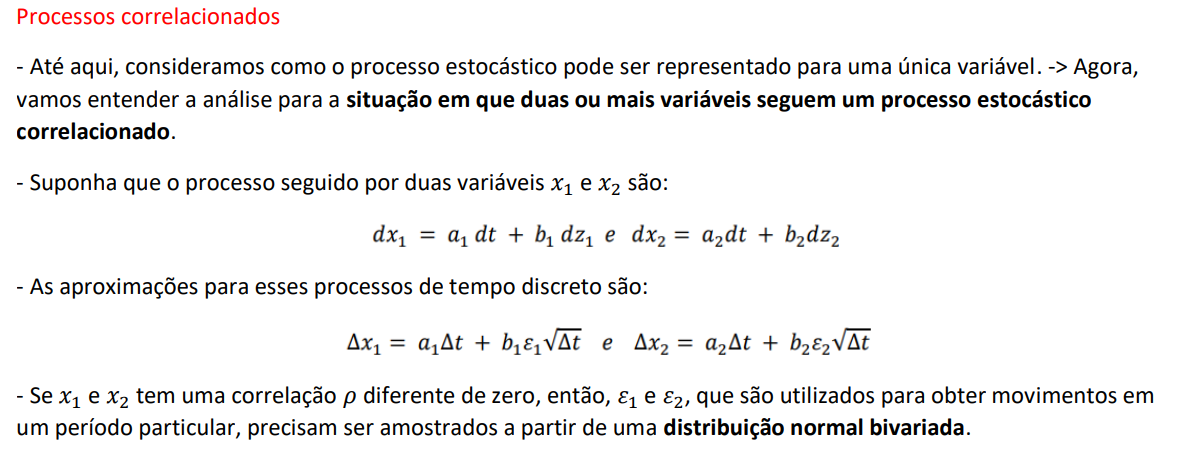

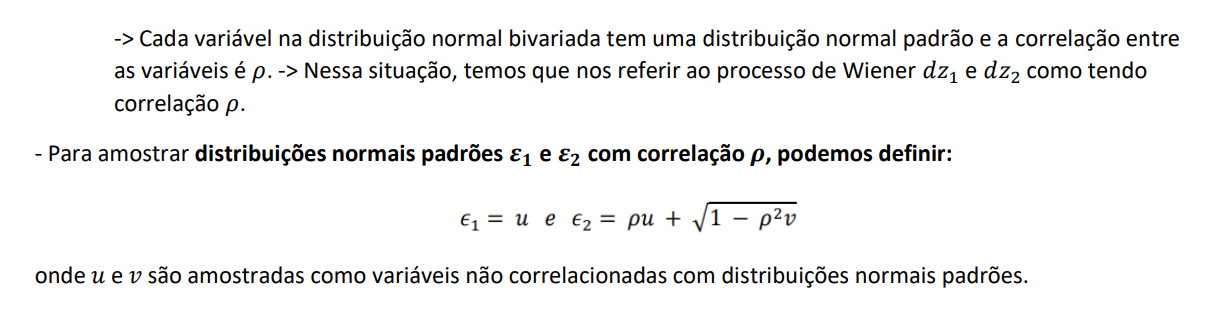

In [ ]:
# Parametros incias
rm(list=ls())
library(quantmod)

In [ ]:
getSymbols(c("COCA34.SA","CRFB3.SA"),src="yahoo",from=as.Date("2019-08-06"))

## Retorno
Ret_coca<-na.omit(exp(diff(log(COCA34.SA$COCA34.SA.Adjusted)))-1)
Ret_car<-na.omit(exp(diff(log(CRFB3.SA$CRFB3.SA.Adjusted)))-1)

#Volatilidade

Vol_coca<-sd(Ret_coca)*sqrt(252)
Vol_car<-sd(Ret_car)*sqrt(252)

mi_coca<-((1+mean(Ret_coca))^(252))-1  ## anualizado
mi_car <- ((1+mean(Ret_car))^(252))-1

#Correlação
ro <- cor(Ret_coca,Ret_car)
cor.test(Ret_coca,Ret_car)


##Primeiro preço para a simulações → último preço resgitrado
S0_coca<-tail(na.omit(COCA34.SA$COCA34.SA.Adjusted),1)
S0_car<-tail(na.omit(CRFB3.SA$CRFB3.SA.Adjusted),1)

# Simulação → e1 e e2 estão correlacionados pelo ro → o u seria a parte que "liga" → a correlação seria ro entre os choques

set.seed(3)

N <- 1000
t <- 3
dt <- 1/252

coca <- matrix(nrow = t/dt,ncol = N)
coca[1,] <- S0_coca

car <- matrix(nrow = t/dt,ncol = N)
car[1,] <- S0_car

for (i in 1:N) {
  for (j in 2:(t/dt)) {
    e =rnorm(1,0,1)
    coca[j,i] = coca[j-1,i] + mi_coca*coca[j-1,i]*dt + Vol_coca*coca[j-1,i]*e*sqrt(dt)
    car[j,i] = car[j-1,i]+ mi_car*car[j-1,i]*dt + Vol_car*car[j-1,i]*(ro*e + sqrt(1-ro^2)*rnorm(1,0,1)*sqrt(dt))
  }
}



## 1) What is the probability that S1 will increase in value and S2 will decrease after one year?

In [ ]:
prob1 = c()
for (i in 1:N) {
  if ((coca[252,i] > S0_coca) & car[252,i] < S0_car) {
    prob1[i] = 1
  }
  else {
    prob1[i] = 0
  }
}
(Q1 = sum(prob1)/length(prob1))


[1] 0.589

## 2) What is the probability that at the end of next year S1 will have appreciated 20% relative to S2?

In [ ]:
prob2 = c()

for (i in 1:N) {
  if ((coca[252,i]/coca[1,i]) >= 1.2*(car[252,i]/car[1,i])){
    prob2[i]=1
  }
  else{
    prob2[i]=0
  }
}
(Q2 = sum(prob2)/length(prob2))

[1] 0.612

## 3) Considering simulations over a three year period and define the checkpoints as the last trading day of each one of these three years. What is the probability that both prices of S1 or S2 are higher than today’s prices at each one of these checkpoints?


In [ ]:
prob3 = c()

for (j in 1:N) {
  if( (coca[252,j] > S0_coca) | (coca[504,j] > S0_coca) | (coca[756,j] > S0_coca) |
      (car[252,j] > S0_car) | (car[504,j] > S0_car) | (car[756,j] > S0_car)){
    prob3[j]=1
  }
  else{
    prob3[j]=0
  }
}

(Q3 = sum(prob3)/length(prob3))

[1] 0.991

In [ ]:
prob = matrix(c(Q1,Q2,Q3), nrow = 3, ncol = 1, byrow = TRUE)
colnames(prob) = c("Probabilidade")
rownames(prob) = c("Questão 1", "Questão 2", "Questão 3")
prob = as.table(prob)
prob


          Probabilidade
Questão 1         0.589
Questão 2         0.612
Questão 3         0.991

# 4. European Calls and Puts: usa rf no lugar do mi
Não sabemos qual o 𝜇 da opção e não precisamos saber. -> Podemos fingir que estamos em um mundo neutro ao
risco e, então, vamos colocar no lugar de 𝜇, o 𝑟𝑓.
Quando o valor da call é calculado utilizando o valor esperado do payoff estamos dando o mesmo peso para todos
os eventos.

-> Isso só pode ser feito quando estamos em um mundo neutro ao risco.


-> Ao utilizar o termo de drift (𝜇) nas simulações não estamos em um mundo neutro ao risco. -> Nesse
sentido, a simulação deve ser feita utilizando a risk free como termo de drift.


In [ ]:
# Parametros basicos e processo d gerar valores
set.seed(70)
rm(list=ls())
t<-1/2
n1<-10000
dt<-1/252
vol<-0.25
rf<-0.05
S<-40
K<-40
mi<-0.1
A<-matrix(nrow = t*252,ncol = n1)
A[1,]<-S

for (i in 2:nrow(A)) {
  for (j in 1:ncol(A)) {
    A[i,j]=A[i-1,j]+A[i-1,j]*rf*dt+A[i-1,j]*vol*rnorm(1,0,sqrt(dt))
  }
}


## 1) What is the price of a European call with strike R$$ 40 six months from now if the price of the stock today is R$ 40? Solve this using the Black and Scholes formula and using Monte Carlo simulations.

In [ ]:
# Monte Carlo
Final = tail(A,1)
Payoff=pmax(Final-40,0)
(Preco_Call=mean(Payoff)*exp(-rf*t))


[1] 3.317996

In [ ]:
BlackScholes <- function(S, K, r, T, sig, type){

  if(type=="C"){
  d1 <- (log(S/K) + (r + sig^2/2)*T) / (sig*sqrt(T))
  d2 <- d1 - sig*sqrt(T)

  value <- S*pnorm(d1) - K*exp(-r*T)*pnorm(d2)
  return(value)}

  if(type=="P"){
  d1 <- (log(S/K) + (r + sig^2/2)*T) / (sig*sqrt(T))
  d2 <- d1 - sig*sqrt(T)

  value <-  (K*exp(-r*T)*pnorm(-d2) - S*pnorm(-d1))
  return(value)}
}

In [ ]:
# Black Scholes
BlackScholes(S, K, rf, t, vol, 'C')

[1] 3.304006

## 2) What is the price of a European put with strike R$$ 40 six months from now if the price of the stock today is R$ 40? Solve this using the Black and Scholes formula and using Monte Carlo simulations.

In [ ]:
# Monte Carlo
Payoff2=pmax(40-Final,0)
(Preco_Put=mean(Payoff2)*exp(-rf*t))


[1] 2.273782

In [ ]:
# Black Scholes
BlackScholes(S, K, rf, t, vol, 'P')

[1] 2.316403

# 5. European options on combined assets: calibracao e precificacao


➔ Basket Options
Uma Basket option é uma opção em um portfólio de underlying assets e possui payoff do tipo
(por exemplo):


[(𝑐1𝑆1
(𝑇) + 𝑐2𝑆2
(𝑇) + ⋯ + 𝑐𝑑𝑆𝑑
(𝑇)) − 𝐾)



No caso do problema, o payoff é dado por:


max((
1/2
PETR4 +
1/2
VALE3) − 𝐾, 0)


Uma basket option europeia pode ser avaliada com simulação de Monte Carlo, assumindo que
os ativos seguem movimentos brownianos geométricos correlacionados.

In [ ]:
rm(list=ls())
library(tidyquant)

ticker1 = 'VALE3.SA'
ticker2 = 'PETR4.SA'
tick1 = getSymbols(ticker1, from = '2017-01-01', auto.assign = F)
tick2 = getSymbols(ticker2, from = '2017-01-01', auto.assign = F)
# Pegando o Ret
ret1 = na.omit(exp(diff(log(tick1[,6])))-1)
ret2 = na.omit(exp(diff(log(tick2[,6])))-1)
# Preco da acao em T
price1 = tail(na.omit(tick1[,6]),1)
price2 = tail(na.omit(tick2[,6]),1)
# Vol
vol1 = sd(ret1)*sqrt(252)
vol2 = sd(ret2)*sqrt(252)
# Correlacao e cov
corr = as.numeric(cor(ret1, ret2))
cova = as.numeric(cov(ret1, ret2))
# Parametros
rf = 0.08
t = 1
n = 10000
sim = n
dt = 1/252
# Parametros para a matriz normal bivariada
S1 = matrix(nrow = (t*252), ncol = sim)
S1[1,] = price1
S2 = matrix(nrow = (t*252), ncol = sim)
S2[1,] =  price2
# Loop
for (j in 1:n) {
  for (i in 2:252*t) {
    e1 = rnorm(1,0,1) # e = u
    e2 = corr*e1 + sqrt(1-corr^2)*rnorm(1,0,1) # e2 = ro*e1 + raiz(1-ro^2)*v
    S1[i,j] = S1[i-1,j] + rf*S1[i-1,j]*dt + vol1*S1[i-1,j]*e1*sqrt(dt) # dst = rf*st-1*dt + sigma*st-1*e1*raiz(dt)
    S2[i,j] = S2[i-1,j] + rf*S2[i-1,j]*dt + vol2*S2[i-1,j]*e2*sqrt(dt)
  }
}

What is price of a call option that expires in one month that
allows you to buy 0.5 * PETR4 + 0.5 * VALE3 for R$ 40? Compare the price of the option obtained
using Monte Carlo and the Black and Scholes formula

[1] 14.49348

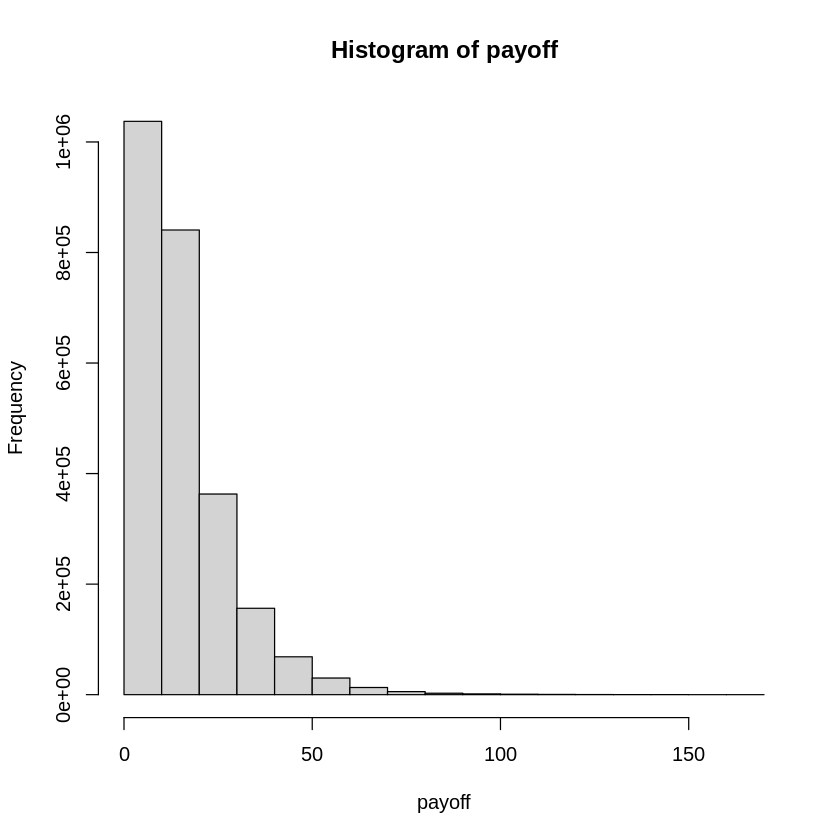

In [ ]:
# Monte Carlo
#Precificar a call
S0 = 0.5*price1 + 0.5*price2 # Valor do S0 para a call
# sd = raiz(var(tick1, tick2))
# var = var(tick1)*0.5 + var(tick2) + 2 * 0.5 * cov(tick1, tick2)
vol = (0.5^2 * vol1^2) + (0.5^2 * vol2^2) + 2 * 0.5^2 * cova %>% sqrt()




ST1 = S1[21,]
ST2 = S2[21,]
ST_opt = 0.5 * S1 + 0.5* S2



payoff = pmax(ST_opt - 40, 0)
(call = mean(payoff) * exp(-rf*t/12))
hist(payoff)

In [ ]:
# Blakc Scholes
BlackScholes <- function(S, K, r, T, sig, type){
  if(type=="C"){
    d1 <- (log(S/K) + (r + sig^2/2)*T) / (sig*sqrt(T))
    d2 <- d1 - sig*sqrt(T)
    value <- S*pnorm(d1) - K*exp(-r*T)*pnorm(d2)
    return(value)}

  if(type=="P"){
    d1 <- (log(S/K) + (r + sig^2/2)*T) / (sig*sqrt(T))
    d2 <- d1 - sig*sqrt(T)
    value <-  (K*exp(-r*T)*pnorm(-d2) - S*pnorm(-d1))
    return(value)}
}



BlackScholes(S = S0, K = 40, r = rf, T = 1, sig = vol, type = 'C')

           VALE3.SA.Adjusted
2023-09-20           14.8757

# 6. Exotic options: Asian and forward-start

In [ ]:
# Simulacao

n = 1000
t = 2/12
dt = 1/252
mu = 0.1
vol = 0.25
rf = 0.05
s0 = 35
k = 40

S = matrix(, 252*t, n)
S[1,] = s0

for (i in 2:(252*t)){
  for (j in 1:n){
    S[i,j] = S[i-1,j] * (1 + (rf*dt) + (vol*rnorm(1,0,sqrt(dt))))
  }
}

## 1) What is the price of an Asian option that expires in two months and has a strike of R$ 40?
Payoff = max(0, Sbarra− 𝐾)


In [ ]:
Sbarra = apply(S,2,mean)
callP = mean(pmax(Sbarra - k,0))
putP = mean(pmax(k - Sbarra, 0))
ST = tail(S,1)


(call = callP*exp(-rf*t))
(put = putP*exp(-rf*t))

[1] 0.009436627

[1] 4.765005

## 2) What is the price of a Forward-start put option with the start in one month, strike of R$ 40, and that expires in two months?

# Tutorial 8

In [ ]:
N <- 1000
t <- 3
dt <- 1/252
rf <- 0.1325
sigma <- 0.25
p0 <- 50



P <- matrix(nrow = t/dt, ncol=N)
P[1,] <- p0



for (i in 2:nrow(P)) {
  for (j in 1:ncol(P)) {
    P[i,j]=P[i-1,j]+P[i-1,j]*rf*dt+P[i-1,j]*sigma*rnorm(1,0,sqrt(dt))
  }

}



k <- 53
dur <- 3
america <- matrix(nrow=dur, ncol=ncol(P))
View(america)



final3 <- P[nrow(P),]-k
payoff3 <- pmax(final3, 0)
payoff3
america[3,] <- payoff3



BlackScholes <- function(S, K, r, T, sig, type){

  if(type=="C"){
    d1 <- (log(S/K) + (r + sig^2/2)*T) / (sig*sqrt(T))
    d2 <- d1 - sig*sqrt(T)

    value <- S*pnorm(d1) - K*exp(-r*T)*pnorm(d2)
    return(value)}

  if(type=="P"){
    d1 <- (log(S/K) + (r + sig^2/2)*T) / (sig*sqrt(T))
    d2 <- d1 - sig*sqrt(T)

    value <-  (K*exp(-r*T)*pnorm(-d2) - S*pnorm(-d1))
    return(value)}
}



p2 = P[nrow(P)-252,]



call_price = mean(final3*exp(-rf))
call_price



# <- BlackScholes(p2, k, rf, t-2, sigma, "C")



mean(call_price)



final2 <- pmax(P[nrow(P)-252,]-k,0)
final2



payoff2 <- pmax(call_price, final2)
payoff2



stop2 <- final2>call_price
stop2
mean(stop2)



# Para o período de escolha no ano 1



p1 = P[nrow(P)-(252*2),]



call_price1 <- BlackScholes(p1, k, rf, t-1, sigma, "C")



final1 <- pmax(P[nrow(P)-(252*2),]-k,0)




payoff1 <- pmax(call_price1, final1)
stop1 <- final1>call_price1
mean(stop1)


# Tutorial 9:  COE 2: Call knock-out PETR4.SA

In [ ]:
rm(list=ls())
library(quantmod)
library(GetBCBData)



getSymbols(c("PETR4.SA","^BVSP"),from = "2019-01-18", to = "2021-01-20")
my.id=c("Taxa de Juros - Selic"=11)
selic=gbcbd_get_series(my.id,last.date = "2021-01-20",first.date="2019-01-18")

petra=na.omit(PETR4.SA$PETR4.SA.Adjusted)
mkt=na.omit(BVSP$BVSP.Adjusted)
rf=xts(selic$value, order.by = selic$ref.date)

# Ret
ret_petra=na.omit(exp(diff(log(petra)))-1)
ret_mkt=na.omit(exp(diff(log(mkt)))-1)
retornos=na.omit(merge(ret_petra,ret_mkt))
# Ret ex
ret_petra_ex=retornos[,1]-(rf)/100
ret_mkt_ex=retornos[,2]-(rf)/100
#CAPM
reg=lm(ret_petra_ex~ret_mkt_ex)
beta=reg$coefficients[2]
risk_free=as.numeric(252*rf[nrow(rf)]/100)
mu_petra=as.double(risk_free + beta*0.0957)#Damodaran

#Simulação
sigma=sd(ret_petra)*sqrt(252)
t=2
dt=1/252
N=1000
S0_pet=as.numeric(PETR4.SA$PETR4.SA.Adjusted[nrow(PETR4.SA),])
pet=matrix(nrow=t/dt,ncol=N)
pet[1,]=S0_pet


for (i in 2:nrow(pet)) {
  for (j in 1:ncol(pet)) {
    pet[i,j]=pet[i-1,j]*(1+(mu_petra*dt)+(sigma*rnorm(1,0,sqrt(dt))))
  }
}

[1] "PETR4.SA" "BVSP"


Fetching Taxa de Juros - Selic [11] from BCB-SGS
 with cache 

	 Found 505 observations




In [ ]:
#COE
barreira=1.65*S0_pet
rebate=0.2125
nominal=1000
variacao=(pet[nrow(pet),]-S0_pet)/S0_pet
payoff=c()
cenarios=c()



#Cenarios
for (j in 1:N) {
  if (pet[nrow(pet),j]>=barreira){
    payoff[j]=nominal*(1+rebate)
    cenarios[j]=3
  }
  else if (pet[nrow(pet),j]>S0_pet){
    payoff[j]=nominal*(1+variacao[j])
    cenarios[j]=2
  }
  else if (pet[nrow(pet),j]<= S0_pet){
    payoff[j]=nominal
    cenarios[j]=1
  }
}



#Probabilidades
prob1=sum(cenarios==1)/N
prob2=sum(cenarios==2)/N
prob3=sum(cenarios==3)/N



vp_esperado=mean(payoff)*(exp(-risk_free*t))
vp_esperado

[1] 1083.959

# Tutorual 10: COE 1: Autocallable worst of basket (Azul, Banco do Brasil, Suzano e Gerdau)

In [ ]:
rm(list=ls())
#Primeiramente, captemos os dados dos underlying assets 252 dias antes da emissao:
library("quantmod")
getSymbols(c("AZUL4.SA","BBAS3.SA","SUZB3.SA","GGBR4.SA","^BVSP"),src ="yahoo", from="2018-07-31",to="2019-07-31")
#Agora, captemos os dados do BCB:
library(GetBCBData)
data_inicial <- '2018-07-31'
data_final   <- '2019-07-31'
my.id   <- c('Taxa de juros - Selic' = 11)
selic   <- gbcbd_get_series(my.id, last.date = data_final, first.date = data_inicial)
###########################################################################################################################
  #Facamos, agora, a calibration. Para estimar o drift, rodaremos um CAPM:
ativo1  <- na.omit(AZUL4.SA$AZUL4.SA.Adjusted)
ativo2  <- na.omit(BBAS3.SA$BBAS3.SA.Adjusted)
ativo3  <- na.omit(SUZB3.SA$SUZB3.SA.Adjusted)
ativo4  <- na.omit(GGBR4.SA$GGBR4.SA.Adjusted)
mkt     <- na.omit(BVSP$BVSP.Adjusted)
rf      <- xts(selic$value, order.by=selic$ref.date)

#Calculo dos Retornos:
ret_1   <- na.omit(exp(diff(log(ativo1)))-1)
ret_2   <- na.omit(exp(diff(log(ativo2)))-1)
ret_3   <- na.omit(exp(diff(log(ativo3)))-1)
ret_4   <- na.omit(exp(diff(log(ativo4)))-1)
ret_m   <- na.omit(exp(diff(log(mkt)))-1)
retornos <- na.omit(merge(ret_1, ret_2, ret_3, ret_4, ret_m, rf))


#Calculo dos excessos de retorno:
ret_1_ex <- retornos[,1] - retornos$rf/100
ret_2_ex <- retornos[,2] - retornos$rf/100
ret_3_ex <- retornos[,3] - retornos$rf/100
ret_4_ex <- retornos[,4] - retornos$rf/100
ret_m_ex <- retornos[,5] - retornos$rf/100

#Calculando os Betas:
regres  <- lm(ret_1_ex ~ ret_m_ex)
beta_1  <- regres$coefficients[2]
regres  <- lm(ret_2_ex ~ ret_m_ex)
beta_2  <- regres$coefficients[2]
regres  <- lm(ret_3_ex ~ ret_m_ex)
beta_3  <- regres$coefficients[2]
regres  <- lm(ret_4_ex ~ ret_m_ex)
beta_4  <- regres$coefficients[2]

       #Calculando o parametro de drift pelo CAPM (ERP=6%):
risk_free <- 252*rf[length(rf)]/100
mu_1    <- as.double(risk_free + beta_1*0.06)
mu_2    <- as.double(risk_free + beta_2*0.06)
mu_3    <- as.double(risk_free + beta_3*0.06)
mu_4    <- as.double(risk_free + beta_4*0.06)

      #Calculando os parametros de volatilidade:
sigma   <- var(retornos[,1:4])*252
vol     <- chol(sigma)
t(vol)%*%vol

###########################################################################################################################
#Realizando as simulations assumindo que os ativos sigam GBM:
t <- 5
dt <- 1/252
N <- 1000
obs <- t*2
cupom <- 0.0555
inv <- 5000
rf<- 0.06

P0_azul = as.numeric(AZUL4.SA$AZUL4.SA.Adjusted[nrow(AZUL4.SA)-1])
P0_brasil = as.numeric(BBAS3.SA$BBAS3.SA.Adjusted[nrow(BBAS3.SA)-1])
P0_ger = as.numeric(GGBR4.SA$GGBR4.SA.Adjusted[nrow(GGBR4.SA)-1])
P0_suz = as.numeric(SUZB3.SA$SUZB3.SA.Adjusted[nrow(SUZB3.SA)-1])

  #Criando as Matrizes para Simulation:
at1 = matrix(P0_azul, (t/dt), N)
at2 = matrix(P0_brasil, (t/dt), N)
at3 = matrix(P0_suz, (t/dt), N)
at4 = matrix(P0_ger, (t/dt), N)

  #Realizando as Simulations:
library(MASS)
for (j in 1:N) {
  for (i in 2:(t/dt)) {

    e = mvrnorm(n = 1, mu = c(0,0,0,0), Sigma = sigma )

    at1[i,j] = at1[i-1,j] + mu_1*at1[i-1,j]*dt + at1[i-1,j]*sqrt(dt)*e[1]
    at2[i,j] = at2[i-1,j] + mu_2*at2[i-1,j]*dt + at2[i-1,j]*sqrt(dt)*e[2]
    at3[i,j] = at3[i-1,j] + mu_3*at3[i-1,j]*dt + at3[i-1,j]*sqrt(dt)*e[3]
    at4[i,j] = at4[i-1,j] + mu_4*at4[i-1,j]*dt + at4[i-1,j]*sqrt(dt)*e[4]

  }
}


Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: TTR

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



[1] "AZUL4.SA" "BBAS3.SA" "SUZB3.SA" "GGBR4.SA" "BVSP"


Fetching Taxa de juros - Selic [11] from BCB-SGS
 with cache 

	 Found 251 observations




,AZUL4.SA.Adjusted,BBAS3.SA.Adjusted,SUZB3.SA.Adjusted,GGBR4.SA.Adjusted
AZUL4.SA.Adjusted,0.17941637,0.09549160,-0.01398544,0.04313624
BBAS3.SA.Adjusted,0.09549160,0.14112619,-0.03260648,0.04318513
SUZB3.SA.Adjusted,-0.01398544,-0.03260648,0.19182493,0.01376257
GGBR4.SA.Adjusted,0.04313624,0.04318513,0.01376257,0.10572749


In [ ]:
###########################################################################################################################
#O retorno esperado de um COE é uma média dos retornos dos possíveis cenários,
#ponderada pelas probabilidades de cada cenário.

#Pela LGN, após um número grande de simulações, as probabililidades dos cenários
#serão as frequências relativas dos cenários realizados nas simulações.

      #Calculando as Probabilidades
c = matrix(0, obs, N)
prob = c() #vetor de probabilidade de sucesso em cada data

for (j in 1:N) {

  c[1,j] = (at1[126,j] >= 0.9*at1[1,j])*(at2[126,j] >= 0.9*at2[1,j])*(at3[126,j] >= 0.9*at3[1,j])*(at4[126,j] >= 0.9*at4[1,j])

  prob[1] = sum(c[1, ])/N

  for (l in 2:obs) {
    if (sum(c[(1:(l-1)),j]) == 0) {
      c[l,j] = (at1[(126*l),j] >= at1[1,j])*(at2[(l*126),j] >= at2[1,j])*(at3[(126*l),j] >= at3[1,j])*(at4[(126*l),j] >= at4[1,j])
    }
    else {
      c[l,j] = 0
    }
    prob[l] = sum(c[l, ])/N
  }
}
prob


[1] 0.280 0.046 0.051 0.024 0.034 0.028 0.018 0.014 0.010 0.015

In [ ]:
 #Calculando os Retornos em cada Cenário:
vp = c() #valor presente dos possíveis pagamentos
for (l in 1:10) {
  vp[l] = (1*(1 + l*cupom)*exp(-rf*(l/2)))-1
}

  #Calculando o Retorno Esperado do Produto:
vp_esperado = matrix(0, obs, 1) #valor presente ponderado pela prob de sucesso
for (l in 1:9) {
  vp_esperado[l,1] = prob[l]*vp[l]
}
vp_esperado[10,1] = prob[10]*vp[10] + (exp(-rf*t)-1)*(1-sum(prob))

ret_esperado=sum(vp_esperado)
ret_esperado


[1] -0.09564089

# Tutorial 11: Buys, Sells and Order Imbalance
Order imbalance: é uma situação resultante de um excesso de ordens de compra ou venda de um determinado título em uma bolsa de negociação, impossibilitando o casamento de ordens de compradores e vendedores.

In [ ]:
rm(list = ls())
library(ggplot2)

load("JBSS3_05_2017.RData")
Data <- df.out

Dados <- Data %>%
  select(SessionDate, TradeDateTime, TradeSign, TradedQuantity, TradePrice) %>%
  mutate(Hora = hour(TradeDateTime)) %>%
  group_by(SessionDate, Hora) %>%
  arrange(SessionDate, Hora)%>%
  mutate(NovaColuna = as.numeric(TradeSign*TradedQuantity)) %>%
  mutate(Quantity_Sign = sum(NovaColuna)) %>% #Quantidade total de compras - Quantidade total de venda
  mutate(Quantity = sum(TradeSign)) %>% # Quantas trades foram comprars - Quantas foram vendas
  mutate(Volume = as.numeric(TradePrice*TradedQuantity*TradeSign)) %>%
  mutate(Volume_var = sum(Volume)) %>% #Volume de compras - Volume de vendas
  mutate(Price_mean = mean(TradePrice)) %>%
  filter(row_number()==n())%>%
  ungroup()%>%
  mutate(id=row_number())%>%
  select(Hora, Quantity_Sign, Quantity, Volume_var, Price_mean, SessionDate, id)